Request:
> work out how to run a performance and load test for this

### Generate as many files as possible to be treated later
`sample generator`

### Process the files using FFT
`FFT processor`

Jonh: 
> We'll get effectively separate files for each of the fibre optic lines and each file will contain 5000 sample locations with 1s of data at 10KHz

### Import needed libraries

In [1]:
import numpy as np
import wave 
import struct
import matplotlib.pyplot as plt

## Sample Generator

In [2]:
frequency = 10000 # 10KHz
num_samples = 5000 # sample location
sampling_rate = 48000.0 # analog to digital convert
amplitude = 32
qty_files = 5 # parameter used to create as many files as needed
nframes = num_samples
framerate = 48000
comptype = "NONE"
compname = "not compressed"
nchannels = 1
sampwidth = 1
freq_noise = np.random.randint(50)

In [3]:
for i in range(qty_files):
    file = "test_"+str(i)+".wav"
    clean_siesm_wave = [np.sin(np.random.random() * frequency * x / sampling_rate) for x in range(num_samples)]
    noise_siesm_wave = [np.sin(np.random.random() * freq_noise * x / sampling_rate) for x in range(num_samples)]
    sism_wave = clean_siesm_wave + noise_siesm_wave
    wav_file=wave.open(file, 'w')
    wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))
    for s in sism_wave:
        wav_file.writeframes(struct.pack('h', int(s*amplitude)))

### FFT Processor

In [4]:
data = {}

for i in range(qty_files):
    filename = "test_"+str(i)+".wav"
    wav_file = wave.open(filename, 'r')
    file = wav_file.readframes(num_samples)
    structure = struct.unpack('{n}h'.format(n=num_samples), 2*file)
    data_fft = np.fft.fft(np.array(structure))
    frequencies = np.abs(data_fft)
    data[filename] = {
            'file' : file,
            'structure' : structure,
            'data_fft' : data_fft,
            'frequencies' : frequencies
           }
    wav_file.close()

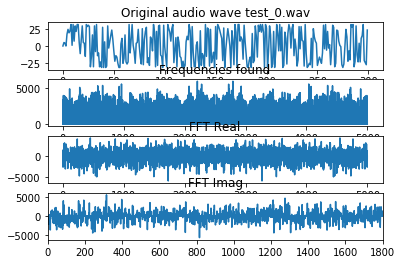

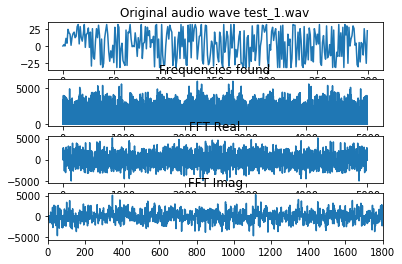

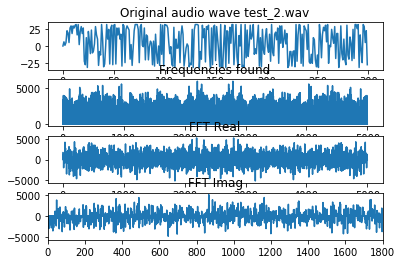

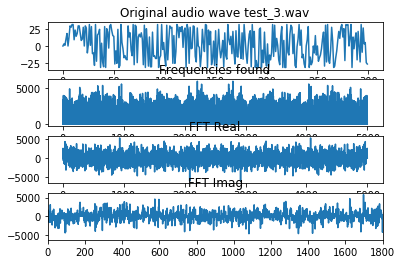

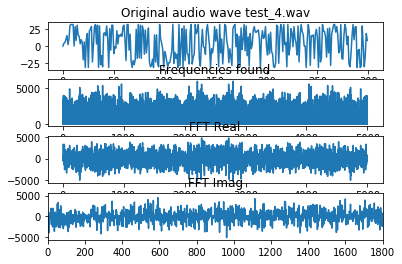

In [5]:
for i in data.keys():
    structure = np.array(data[i]['structure'])
    data_fft = data[i]['data_fft']
    frequecies = data[i]['frequencies']

    plt.subplot(4,1,1)
    plt.plot(structure[:300])
    plt.title("Original audio wave " + i)
    plt.subplot(4,1,2)
    plt.plot(frequencies)
    plt.title("Frequencies found")
    plt.subplot(4,1,3)
    plt.plot(data_fft.real)
    plt.title("FFT Real")
    plt.subplot(4,1,4)
    plt.plot(data_fft.imag)
    plt.title("FFT Imag")
    plt.xlim(0,1800)
    plt.show()

##### Source: [Audio and Digital Signal Processing(DSP) in Python](https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/)